In [2]:
"""
=============================================================================
Gradient Descent Implementation
=============================================================================
This script implements gradient descent for a machine learning exercise.
It includes the implementation of backtracking line search with Armijo and Wolfe conditions.
"""

'\n=============================================================================\nGradient Descent Implementation\n=============================================================================\nThis script implements gradient descent for a machine learning exercise.\nIt includes the implementation of backtracking line search with Armijo and Wolfe conditions.\n'

In [3]:
#=============================================================================
# Import packages
#=============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Change the plotting style
plt.style.use('seaborn-v0_8-whitegrid')

# Define the function to minimize

In [5]:
def f(X):
    """
    Compute the function to minimize.
    
    Parameters:
    -----------
    X : array-like
        Point at which to evaluate the function
        
    Returns:
    --------
    float
        Function value at X
    """
    x, y = X
    return (x-2)**4 + (x-2*y)**2

In [6]:
def gradf(X):
    """
    Compute the gradient of the function.
    
    Parameters:
    -----------
    X : array-like
        Point at which to evaluate the gradient
        
    Returns:
    --------
    array-like
        Gradient at X
    """
    x, y = X
    dx = 4*(x-2)**3 + 2*(x-2*y)
    dy = -4*(x-2*y)
    return np.array([dx, dy])

# Plotting functions

In [7]:
def plot_function():
    """
    Plot the contour of the function to minimize.
    """
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(np.array([X, Y]))
    
    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=20)
    plt.colorbar(label='f(x,y)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour Plot of f(x,y)')
    plt.grid(True)
    plt.show()

In [8]:
def plot_gradient_descent_path(path, f_values):
    """
    Plot the path taken by gradient descent.
    
    Parameters:
    -----------
    path : array-like
        Points visited during gradient descent
    f_values : array-like
        Function values at each point
    """
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = f(np.array([X, Y]))
    
    plt.figure(figsize=(12, 5))
    
    # Plot contour with path
    plt.subplot(121)
    plt.contour(X, Y, Z, levels=20)
    plt.plot(path[:, 0], path[:, 1], 'r.-', label='Gradient descent path')
    plt.colorbar(label='f(x,y)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient Descent Path')
    plt.legend()
    plt.grid(True)
    
    # Plot function values
    plt.subplot(122)
    plt.plot(f_values, 'b.-')
    plt.xlabel('Iteration')
    plt.ylabel('f(x,y)')
    plt.title('Function Values')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Backtracking line search

In [9]:
def armijo_condition(X, alpha, p, c1=1e-4):
    """
    Check Armijo condition for line search.
    
    Parameters:
    -----------
    X : array-like
        Current point
    alpha : float
        Step size
    p : array-like
        Search direction
    c1 : float
        Armijo condition parameter
        
    Returns:
    --------
    bool
        True if Armijo condition is satisfied
    """
    return f(X + alpha*p) <= f(X) + c1*alpha*np.dot(gradf(X), p)

In [10]:
def wolfe_condition(X, alpha, p, c2=0.9):
    """
    Check Wolfe condition for line search.
    
    Parameters:
    -----------
    X : array-like
        Current point
    alpha : float
        Step size
    p : array-like
        Search direction
    c2 : float
        Wolfe condition parameter
        
    Returns:
    --------
    bool
        True if Wolfe condition is satisfied
    """
    return np.dot(gradf(X + alpha*p), p) >= c2*np.dot(gradf(X), p)

In [11]:
def backtracking_line_search(X, p, alpha0=1.0, rho=0.5, c1=1e-4, c2=0.9):
    """
    Perform backtracking line search.
    
    Parameters:
    -----------
    X : array-like
        Current point
    p : array-like
        Search direction
    alpha0 : float
        Initial step size
    rho : float
        Reduction factor
    c1 : float
        Armijo condition parameter
    c2 : float
        Wolfe condition parameter
        
    Returns:
    --------
    float
        Step size satisfying Armijo and Wolfe conditions
    """
    alpha = alpha0
    while not (armijo_condition(X, alpha, p, c1) and wolfe_condition(X, alpha, p, c2)):
        alpha = rho * alpha
    return alpha

# Gradient descent implementation

In [12]:
def gradient_descent(X0, alpha_type='fixed', alpha=0.01, max_steps=1000, tolerance=1e-6):
    """
    Implement gradient descent algorithm.
    
    Parameters:
    -----------
    X0 : array-like
        Initial point
    alpha_type : str
        Type of step size ('fixed' or 'backtracking')
    alpha : float
        Fixed step size (if alpha_type='fixed')
    max_steps : int
        Maximum number of iterations
    tolerance : float
        Convergence tolerance
        
    Returns:
    --------
    tuple
        Final solution point, function values, path, and number of steps
    """
    X = np.array(X0)
    path = [X]
    f_values = [f(X)]
    
    for i in range(max_steps):
        grad = gradf(X)
        if np.linalg.norm(grad) < tolerance:
            break
            
        if alpha_type == 'backtracking':
            alpha = backtracking_line_search(X, -grad)
            
        X = X - alpha * grad
        path.append(X)
        f_values.append(f(X))
    
    return X, np.array(f_values), np.array(path), i+1


# Main execution


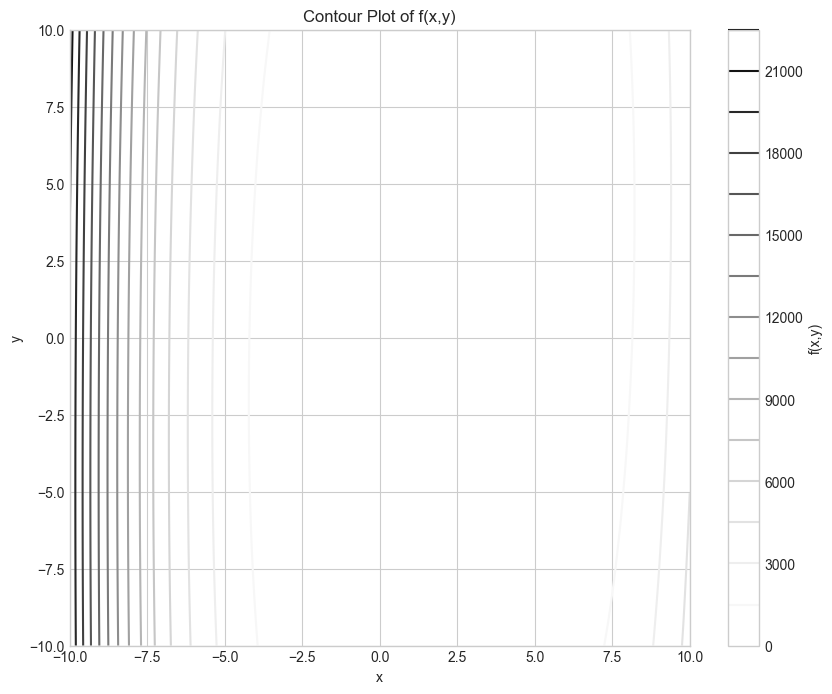

Running gradient descent with fixed step size...
Fixed step size: Found minimum at [nan nan] after 1000 steps
Final function value: nan

Running gradient descent with backtracking line search...
Backtracking: Found minimum at [1.97731834 0.98865336] after 1000 steps
Final function value: 0.000000



C:\Users\Henrii\AppData\Local\Temp\ipykernel_26032\2928102504.py:16: RuntimeWarning: overflow encountered in scalar power
  return (x-2)**4 + (x-2*y)**2
C:\Users\Henrii\AppData\Local\Temp\ipykernel_26032\3767107.py:35: RuntimeWarning: invalid value encountered in subtract
  X = X - alpha * grad


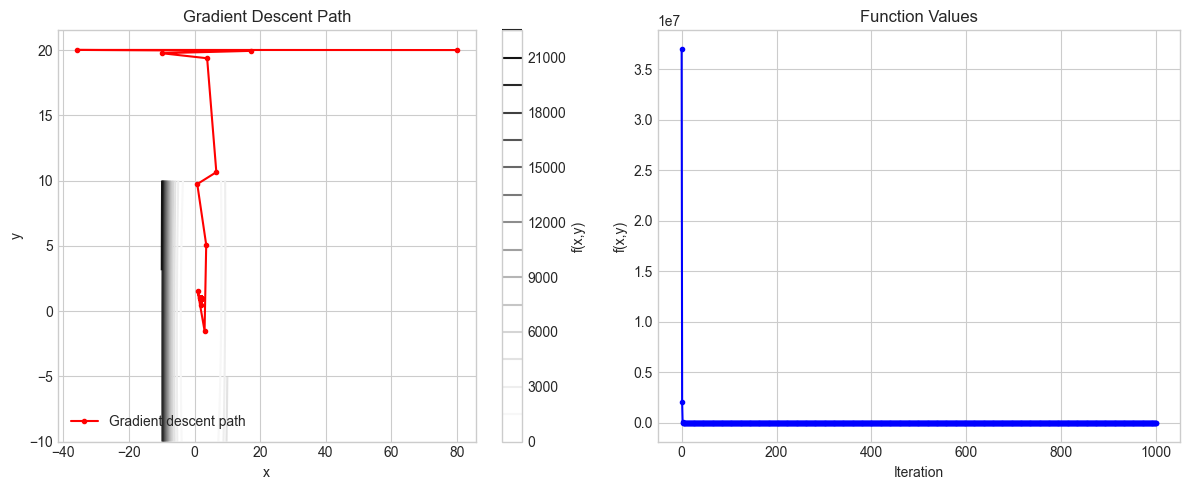

In [13]:
if __name__ == "__main__":
    # Plot the function
    plot_function()
    
    # Run gradient descent from point (80, 20)
    X0 = np.array([80, 20])
    
    # Compare fixed step size vs backtracking
    print("Running gradient descent with fixed step size...")
    X_fixed, f_values_fixed, path_fixed, steps_fixed = gradient_descent(X0, alpha_type='fixed', alpha=0.01)
    print(f"Fixed step size: Found minimum at {X_fixed} after {steps_fixed} steps")
    print(f"Final function value: {f_values_fixed[-1]:.6f}\n")
    
    print("Running gradient descent with backtracking line search...")
    X_bt, f_values_bt, path_bt, steps_bt = gradient_descent(X0, alpha_type='backtracking')
    print(f"Backtracking: Found minimum at {X_bt} after {steps_bt} steps")
    print(f"Final function value: {f_values_bt[-1]:.6f}\n")
    
    # Plot results
    plot_gradient_descent_path(path_bt, f_values_bt) 